# Make various plots that I am gonna need

These are plots for talks and demos, and also just debugging and validation. 

There might also be some random plots in here as I work out things.

<IPython.core.display.Javascript object>


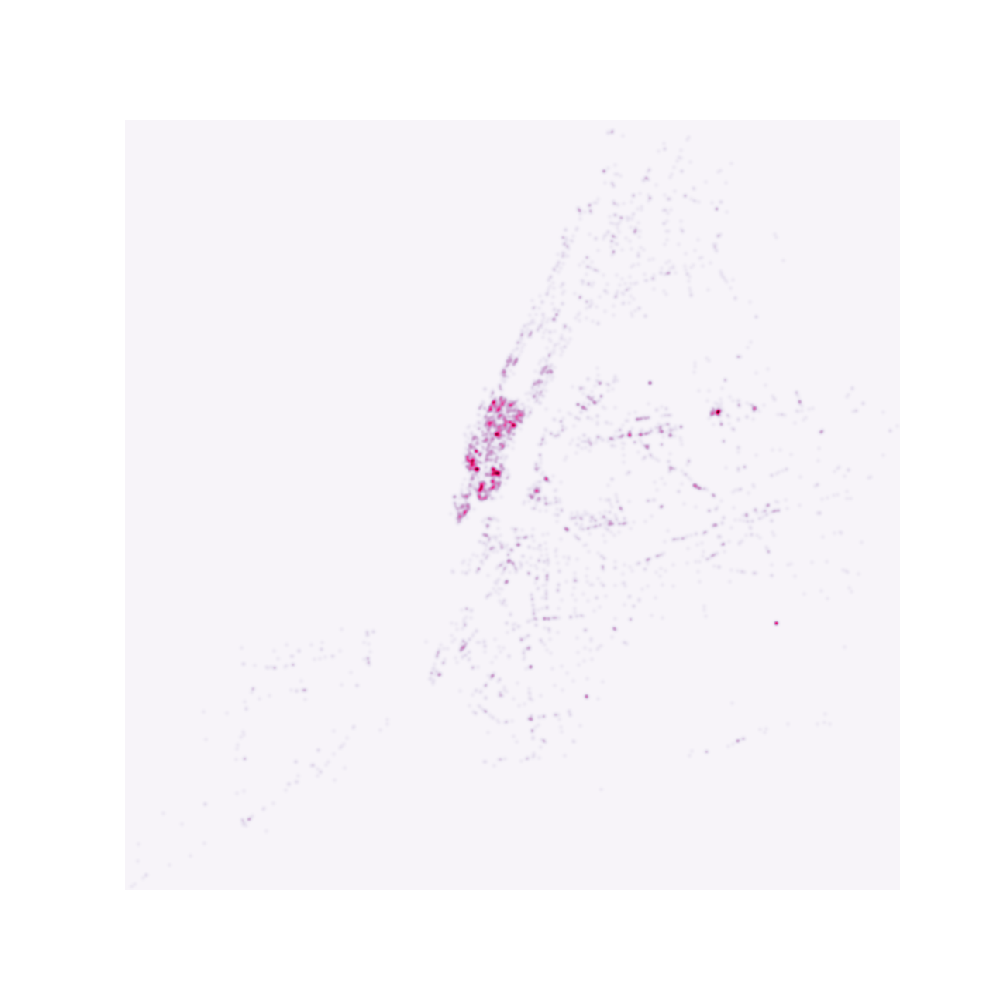

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import pandas as pd
from utils.utilities import mk_heatmap
from utils.strings import DATE
from tqdm.autonotebook import tqdm

inspecs = pd.read_csv('./data/inspecs_heat_scores.csv', parse_dates=[DATE])

# break out the month and year so we can group on them
inspecs['wk'] = inspecs[DATE].dt.week
inspecs['mon'] = inspecs[DATE].dt.month
inspecs['yr'] = inspecs[DATE].dt.year


fig = plt.figure(figsize=(10,10))

grouped = inspecs.groupby(['yr', 'mon'])

# work out the extent for all the data
img, extent_big, xedges, yedges = mk_heatmap(inspecs.longitude.values,
                                         inspecs.latitude.values, s=2, bins=1000)


# # ims is a list of lists, each row is a list of artists to draw in the
# # current frame; here we are just animating one artist, the image, in
# # each frame
ims = []
i=0
for (yr, mon), group in tqdm(grouped, total=len(grouped)):
    x = group.longitude.values
    y = group.latitude.values
    img, _, _, _ = mk_heatmap(x, y, s=2, bins=[xedges, yedges])
    im = plt.imshow(img, extent=extent_big, origin='lower', cmap=cm.PuRd, animated=True)
    plt.axis('off')
    ims.append([im])
 
    
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=10)

ani.save('animation.gif', writer='imagemagick')
# ani.save('dynamic_images.gif')

#plt.show()